## Полиномиальная регрессия

In [31]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.linear_model import LinearRegression

In [32]:
df = pd.read_csv("data/after_3s.csv")
df.drop(columns =['Unnamed: 0'], axis = 1, inplace = True)
df.head()

,Соотношение матрица-наполнитель,"Плотность, кг/м3","модуль упругости, ГПа","Количество отвердителя, м.%","Содержание эпоксидных групп,%_2","Температура вспышки, С_2","Поверхностная плотность, г/м2","Модуль упругости при растяжении, ГПа","Прочность при растяжении, МПа","Потребление смолы, г/м2","Угол нашивки, град",Шаг нашивки,Плотность нашивки
0,1.857143,2030.0,-0.003593,50.00,23.750000,284.615385,210.0,70.0,3000.0,220.0,0.0,4.0,60.0
1,1.857143,2030.0,-0.003593,129.00,21.250000,300.000000,210.0,70.0,3000.0,220.0,0.0,5.0,47.0
2,2.771331,2030.0,0.039599,111.86,22.267857,284.615385,210.0,70.0,3000.0,220.0,0.0,5.0,57.0
3,2.767918,2000.0,0.024458,111.86,22.267857,284.615385,210.0,70.0,3000.0,220.0,0.0,5.0,60.0
4,2.569620,1910.0,0.203120,111.86,22.267857,284.615385,210.0,70.0,3000.0,220.0,0.0,5.0,70.0


In [3]:
df.columns

Index(['Соотношение матрица-наполнитель', 'Плотность, кг/м3',
       'модуль упругости, ГПа', 'Количество отвердителя, м.%',
       'Содержание эпоксидных групп,%_2', 'Температура вспышки, С_2',
       'Поверхностная плотность, г/м2', 'Модуль упругости при растяжении, ГПа',
       'Прочность при растяжении, МПа', 'Потребление смолы, г/м2',
       'Угол нашивки, град', 'Шаг нашивки', 'Плотность нашивки'],
      dtype='object')

In [4]:
# PolynomialFeatures
from sklearn.preprocessing import PolynomialFeatures
X = df.drop(['Соотношение матрица-наполнитель', 'Угол нашивки, град','Модуль упругости при растяжении, ГПа',
             'модуль упругости, ГПа', 'Прочность при растяжении, МПа'],axis = 1)
y = df['Соотношение матрица-наполнитель']

In [5]:
X.columns

Index(['Плотность, кг/м3', 'Количество отвердителя, м.%',
       'Содержание эпоксидных групп,%_2', 'Температура вспышки, С_2',
       'Поверхностная плотность, г/м2', 'Потребление смолы, г/м2',
       'Шаг нашивки', 'Плотность нашивки'],
      dtype='object')

In [6]:
y.name

'Соотношение матрица-наполнитель'

In [8]:
#splitting Train and Test 
from sklearn.model_selection import train_test_split


In [9]:
#training the simple Linear Regression model on the training set
poly = PolynomialFeatures (degree = 2)
X_poly = poly.fit_transform(X)
X_train,X_test,y_train,y_test = train_test_split(X_poly,y, test_size = 0.30, random_state = 0)

In [10]:
#standard scaler (fit transform on train, fit only on test)
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train.astype(np.float))
X_test= sc.transform(X_test.astype(np.float))

C:\Users\vagid\AppData\Local\Temp/ipykernel_6264/1104923244.py:4: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  X_train = sc.fit_transform(X_train.astype(np.float))
C:\Users\vagid\AppData\Local\Temp/ipykernel_6264/1104923244.py:5: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  X_test= sc.transform(X_test.astype(np.float))


In [11]:
#fit and predict model
poly_lr = LinearRegression().fit(X_train,y_train)
y_pred = poly_lr.predict(X_test)

In [12]:
#checking accuracy of Polynomial Regression Model
print('Polynomial Regression Model:')
print("Train Score {:.2f}".format(poly_lr.score(X_train,y_train)))
print("Test Score {:.2f}".format(poly_lr.score(X_test, y_test)))

Polynomial Regression Model:
Train Score 0.04
Test Score 0.01


## Polynomial Regression Model:
# Train Score 0.05--- 5%
# Test Score -0.02--- что значит "-"?)

In [13]:
#evaluate the model - Coefficient and constant
print(poly_lr.intercept_)
print(poly_lr.coef_)

2.9386546658193757
[-4.31289892e-16 -2.26368191e+00  1.31674654e+00  9.68602517e-01
  1.06187949e+00 -9.89726721e-02 -4.83714354e-02 -1.37523706e+00
  7.56780012e-01  2.67224293e+00 -1.00326514e+00 -7.78115810e-01
 -1.76319787e-01 -3.51428977e-01  3.49660079e-01  1.21311392e+00
 -6.18977621e-01  1.50632962e-01 -3.69064485e-01 -4.52680541e-01
  7.81890057e-02  3.21359916e-01 -5.03361202e-02  2.26058430e-02
  2.25295204e-01 -5.17531304e-01  1.70893675e-02 -2.08642167e-01
  2.22466722e-01  4.57482733e-02  7.45241303e-02  1.05909447e-01
 -5.63144075e-02 -1.47196214e-01 -5.10888339e-01 -7.05910313e-02
  8.22830228e-02  1.44113274e-02  2.76238203e-01 -1.66093129e-01
 -3.85919218e-02 -1.34352204e-01  1.25638611e-02  1.94776654e-01
  1.22519670e-01]


In [14]:
#compare actual output values with predicted values
df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
df1 = df.head(10)
df1

,Actual,Predicted
722,2.781140,3.052438
77,3.711676,3.074164
877,1.626946,2.972221
613,3.165741,2.987321
903,3.582426,2.806251
531,2.505018,2.958571
399,1.273273,2.546153
452,2.086086,3.146771
31,2.916150,3.071733
356,1.165743,2.841175


In [15]:
# evaluate the performance of the algorithm (MAE - MSE - RMSE)
from sklearn import metrics
print('MAE:', metrics.mean_absolute_error(y_test, y_pred))  
print('MSE:', metrics.mean_squared_error(y_test, y_pred))  
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

MAE: 0.7491855365450355
MSE: 0.8887028513734748
RMSE: 0.942710375127735


---

---

1 к 1

In [16]:
df = pd.read_csv("data/after_3s.csv")
df.drop(columns =['Unnamed: 0'], axis = 1, inplace = True)
df.head()

,Соотношение матрица-наполнитель,"Плотность, кг/м3","модуль упругости, ГПа","Количество отвердителя, м.%","Содержание эпоксидных групп,%_2","Температура вспышки, С_2","Поверхностная плотность, г/м2","Модуль упругости при растяжении, ГПа","Прочность при растяжении, МПа","Потребление смолы, г/м2","Угол нашивки, град",Шаг нашивки,Плотность нашивки
0,1.857143,2030.0,-0.003593,50.00,23.750000,284.615385,210.0,70.0,3000.0,220.0,0.0,4.0,60.0
1,1.857143,2030.0,-0.003593,129.00,21.250000,300.000000,210.0,70.0,3000.0,220.0,0.0,5.0,47.0
2,2.771331,2030.0,0.039599,111.86,22.267857,284.615385,210.0,70.0,3000.0,220.0,0.0,5.0,57.0
3,2.767918,2000.0,0.024458,111.86,22.267857,284.615385,210.0,70.0,3000.0,220.0,0.0,5.0,60.0
4,2.569620,1910.0,0.203120,111.86,22.267857,284.615385,210.0,70.0,3000.0,220.0,0.0,5.0,70.0


In [17]:
df.columns

Index(['Соотношение матрица-наполнитель', 'Плотность, кг/м3',
       'модуль упругости, ГПа', 'Количество отвердителя, м.%',
       'Содержание эпоксидных групп,%_2', 'Температура вспышки, С_2',
       'Поверхностная плотность, г/м2', 'Модуль упругости при растяжении, ГПа',
       'Прочность при растяжении, МПа', 'Потребление смолы, г/м2',
       'Угол нашивки, град', 'Шаг нашивки', 'Плотность нашивки'],
      dtype='object')

1к1

In [18]:
X = df.drop(['Соотношение матрица-наполнитель', 'Угол нашивки, град','Модуль упругости при растяжении, ГПа',
             'модуль упругости, ГПа', 'Прочность при растяжении, МПа','Плотность, кг/м3', 'Количество отвердителя, м.%', 
             'Температура вспышки, С_2', 'Поверхностная плотность, г/м2', 
             'Потребление смолы, г/м2', 'Шаг нашивки', 'Плотность нашивки'],axis = 1)
y = df['Соотношение матрица-наполнитель']

In [19]:
X

,"Содержание эпоксидных групп,%_2"
0,23.750000
1,21.250000
2,22.267857
3,22.267857
4,22.267857
...,...
994,20.123249
995,19.599769
996,23.957502
997,19.246945


In [20]:
#splitting Train and Test 
from sklearn.model_selection import train_test_split
#training the simple Linear Regression model on the training set
poly = PolynomialFeatures (degree = 2)
X_poly = poly.fit_transform(X)
X_train,X_test,y_train,y_test = train_test_split(X_poly,y, test_size = 0.20, random_state = 0)

In [21]:
#standard scaler (fit transform on train, fit only on test)
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train.astype(np.float))
X_test= sc.transform(X_test.astype(np.float))

C:\Users\vagid\AppData\Local\Temp/ipykernel_6264/1104923244.py:4: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  X_train = sc.fit_transform(X_train.astype(np.float))
C:\Users\vagid\AppData\Local\Temp/ipykernel_6264/1104923244.py:5: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  X_test= sc.transform(X_test.astype(np.float))


In [22]:
#fit and predict model
poly_lr = LinearRegression().fit(X_train,y_train)
y_pred = poly_lr.predict(X_test)

In [23]:
#checking accuracy of Polynomial Regression Model
print('Polynomial Regression Model:')
print("Train Score {:.2f}".format(poly_lr.score(X_train,y_train)))
print("Test Score {:.2f}".format(poly_lr.score(X_test, y_test)))

Polynomial Regression Model:
Train Score 0.00
Test Score -0.00


In [24]:
X_test

array([[ 0.00000000e+00, -9.84143360e-01, -9.84137001e-01],
       [ 0.00000000e+00,  8.22760893e-01,  8.04191168e-01],
       [ 0.00000000e+00,  8.31942142e-01,  8.14164034e-01],
       [ 0.00000000e+00,  3.98588196e-03, -4.91573164e-02],
       [ 0.00000000e+00, -1.49445298e+00, -1.42636571e+00],
       [ 0.00000000e+00, -4.56515770e-01, -4.97800413e-01],
       [ 0.00000000e+00, -2.33227247e+00, -2.09239297e+00],
       [ 0.00000000e+00, -7.31746663e-01, -7.55183632e-01],
       [ 0.00000000e+00,  1.46324625e+00,  1.52138549e+00],
       [ 0.00000000e+00, -1.51513251e+00, -1.44370289e+00],
       [ 0.00000000e+00,  1.13790415e+00,  1.15163004e+00],
       [ 0.00000000e+00,  4.27423072e-02, -1.03707459e-02],
       [ 0.00000000e+00,  4.97128415e-01,  4.56275631e-01],
       [ 0.00000000e+00,  7.35904612e-01,  7.10289279e-01],
       [ 0.00000000e+00,  7.33933100e-01,  7.08167148e-01],
       [ 0.00000000e+00,  1.54761596e-01,  1.02633150e-01],
       [ 0.00000000e+00, -1.65959096e+00

In [25]:
y_test

722    2.781140
77     3.711676
877    1.626946
613    3.165741
903    3.582426
         ...   
150    2.829594
299    4.643415
239    3.771195
981    3.810614
435    2.594686
Name: Соотношение матрица-наполнитель, Length: 200, dtype: float64

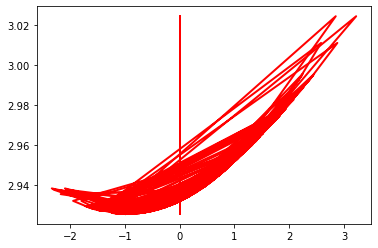

In [26]:
#prediction vs test set
#plt.scatter(X_test, y_test,  color='blue')
plt.plot(X_test, y_pred, color='red', linewidth=2)
plt.show()

In [27]:
#plt.scatter(X_test, y_test,  color='blue')

# МНОЖЕСТВЕННАЯ?

In [33]:
from sklearn.preprocessing import PolynomialFeatures
X = df.drop(['Соотношение матрица-наполнитель', 'Угол нашивки, град','Модуль упругости при растяжении, ГПа',
             'модуль упругости, ГПа', 'Прочность при растяжении, МПа'],axis = 1)
y = df['Соотношение матрица-наполнитель']

In [34]:
#splitting Train and Test 
from sklearn.model_selection import train_test_split
poly = PolynomialFeatures (degree = 2)
X_poly = poly.fit_transform(X)
X_train,X_test,y_train,y_test = train_test_split(X_poly,y, test_size = 0.30, random_state = 0)

In [35]:
#standard scaler (fit transform on train, fit only on test)
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train.astype(np.float))
X_test= sc.transform(X_test.astype(np.float))

C:\Users\vagid\AppData\Local\Temp/ipykernel_360/1104923244.py:4: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  X_train = sc.fit_transform(X_train.astype(np.float))
C:\Users\vagid\AppData\Local\Temp/ipykernel_360/1104923244.py:5: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  X_test= sc.transform(X_test.astype(np.float))


In [36]:
#fit and predict model
poly_lr = LinearRegression().fit(X_train,y_train)
y_pred = poly_lr.predict(X_test)

In [37]:
#checking accuracy of Polynomial Regression Model
print('Polynomial Regression Model:')
print("Train Score {:.2f}".format(poly_lr.score(X_train,y_train)))
print("Test Score {:.2f}".format(poly_lr.score(X_test, y_test)))

Polynomial Regression Model:
Train Score 0.04
Test Score -0.01


In [38]:
from sklearn.preprocessing import PolynomialFeatures

poly = PolynomialFeatures(2, include_bias=False)
poly_df = poly.fit_transform(X) 
scaled_poly_df = scaler.fit_transform(poly_df) 
print(f"shape: {scaled_poly_df.shape}")


linear_regression_model.fit(scaled_poly_df, y)
predictions = linear_regression_model.predict(scaled_poly_df) 
mse = mean_squared_error(y, predictions) 
print("RMSE: {}".format(np.sqrt(mse)))

shape: (999, 44)
RMSE: 0.8999351332255395
